## Лабораторная работа - Работа с текстом

Лабораторная работа посвящена работе с текстом и классификации. Мы будем классифицировать твиты о коронавирусе. Скачать данные из папки data.

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('coronavirus_tweets_with_labels.csv', encoding='ISO-8859-1', parse_dates=['TweetAt'])
print(df.shape)
df.head()

(41157, 6)


C:\Users\Egor\AppData\Local\Temp\ipykernel_12852\3026756199.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('coronavirus_tweets_with_labels.csv', encoding='ISO-8859-1', parse_dates=['TweetAt'])


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**Задание 1.**

Сделайте 3 группы в целевой переменной: `Extremely Positive` отметьте как `Positive`, а `Extremely Negative` – `Negative`. Сколько наблюдений в каждом классе? Закодируйте их в числовом виде простым LabelEncoding'ом.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Преобразование классов
df['Sentiment'] = df['Sentiment'].replace({'Extremely Positive': 'Positive', 'Extremely Negative': 'Negative'})

# Подсчёт наблюдений в каждом классе
class_counts = df['Sentiment'].value_counts()
print("Количество наблюдений в каждом классе:")
print(class_counts)

# Кодирование классов
label_encoder = LabelEncoder()
df['SentimentEncoded'] = label_encoder.fit_transform(df['Sentiment'])

# Вывод первых нескольких строк для проверки
print(df[['Sentiment', 'SentimentEncoded']].head())

Количество наблюдений в каждом классе:
Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64
  Sentiment  SentimentEncoded
0   Neutral                 1
1  Positive                 2
2  Positive                 2
3  Positive                 2
4  Negative                 0


**Задание 2.**

Добавьте колонку с месяцем твита. Нарисуйте barchart, где по оси Х – месяц, по оси Y – количество твитов в этом месяце.

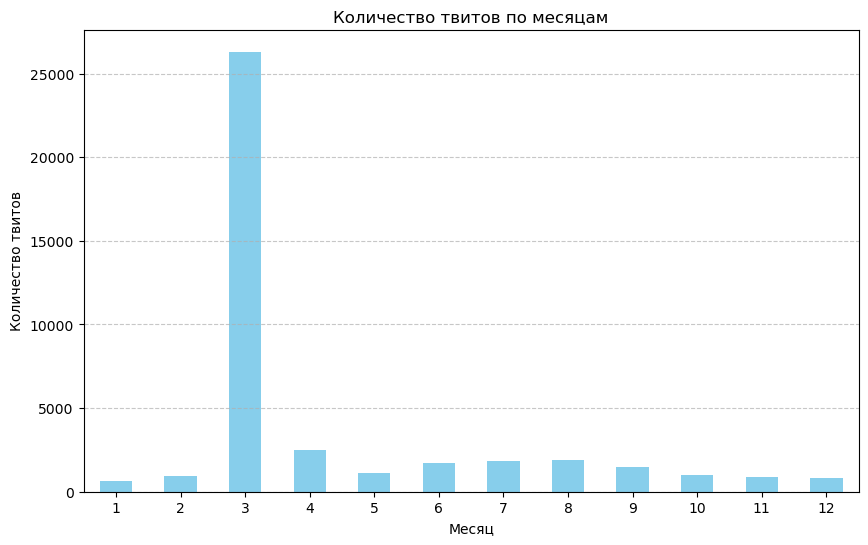

In [12]:
import matplotlib.pyplot as plt

# Добавление колонки с месяцем
df['Month'] = df['TweetAt'].dt.month

# Подсчёт количества твитов по месяцам
tweets_per_month = df['Month'].value_counts().sort_index()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
tweets_per_month.plot(kind='bar', color='skyblue')
plt.title('Количество твитов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество твитов')
plt.xticks(ticks=range(len(tweets_per_month)), labels=tweets_per_month.index, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Задание 3.**

Очистим твиты. Удалите ссылки, пунктуацию, теги, которые начинаются с @ и #.

In [13]:
import re

def clean_tweet(text):
    # Удаление ссылок
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Удаление тегов, начинающихся с @ и #
    text = re.sub(r'@\w+|#\w+', '', text)
    # Удаление пунктуации
    text = re.sub(r'[^\w\s]', '', text)
    # Удаление лишних пробелов
    text = text.strip()
    return text

# Применение функции очистки к каждому твиту
df['CleanedText'] = df['OriginalTweet'].apply(clean_tweet)

# Вывод первых нескольких строк для проверки
print(df[['OriginalTweet', 'CleanedText']].head())


                                       OriginalTweet  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1  advice Talk to your neighbours family to excha...   
2  Coronavirus Australia: Woolworths to give elde...   
3  My food stock is not the only one which is emp...   
4  Me, ready to go at supermarket during the #COV...   

                                         CleanedText  
0                                           and  and  
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia Woolworths to give elder...  
3  My food stock is not the only one which is emp...  
4  Me ready to go at supermarket during the  outb...  


**Задание 4.**

Токенизируйте тексты твитов с помощью `word_tokenize()` из библиотеки `nltk`. Лемматизируйте с помощью `WordNetLemmatizer()` из той же библиотеки.

In [14]:
import nltk
nltk.download('punkt_tab')
# Укажите правильный путь для данных
nltk.data.path.append('/root/nltk_data')

# Загрузка необходимых ресурсов
nltk.download('punkt-tab', download_dir='/root/nltk_data')
nltk.download('wordnet', download_dir='/root/nltk_data')
nltk.download('omw-1.4', download_dir='/root/nltk_data')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Egor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Error loading punkt-tab: Package 'punkt-tab' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Создание экземпляра лемматайзера
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # Токенизация текста
    tokens = word_tokenize(text)
    # Лемматизация каждого токена
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Применение токенизации и лемматизации к очищенным твитам
df['TokenizedLemmatized'] = df['CleanedText'].apply(tokenize_and_lemmatize)

# Вывод первых нескольких строк для проверки
print(df[['CleanedText', 'TokenizedLemmatized']].head())


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Egor/nltk_data'
    - 'C:\\Users\\Egor\\anaconda3\\nltk_data'
    - 'C:\\Users\\Egor\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Egor\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Egor\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - '/root/nltk_data'
    - '/root/nltk_data'
    - '/root/nltk_data'
    - ''
**********************************************************************


**Задание 5.**

Разделите данные на обучающую и тестовую выборку (используем только обработанные тексты твитов из прошлого задания и разметку) в соотношении 70 на 30.

In [ ]:
from sklearn.model_selection import train_test_split

# Подготовка данных
X = df['TokenizedLemmatized'].apply(lambda x: ' '.join(x))  # Преобразуем список токенов обратно в строку
y = df['SentimentEncoded']  # Предполагается, что у вас есть закодированные метки классов

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Проверка размеров выборок
print(f"Размер обучающей выборки: {X_train.shape[0]} образцов")
print(f"Размер тестовой выборки: {X_test.shape[0]} образцов")


**Задание 6.**

Примените `CountVectorizer()`, не забудьте убрать стоп-слова с помощью аргумента `stop_words='english'`. Обучите логистическую регрессию. Выведите `classification_report` из библиотеки `sklearn`.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Преобразование текстов в числовой формат
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_vec)

# Вывод отчета классификации
print(classification_report(y_test, y_pred))


**Задание 7.**

Подберите параметры `C` и `penalty` для логистической регрессии так, чтобы получилось улучшить результат.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Задание параметров для перебора
param_grid = {
    'C': [0.1, 1, 10],  # Уменьшенное количество значений
    'penalty': ['l2'],  # Упрощение до одного типа регуляризации
    'solver': ['lbfgs']  # Более быстрый алгоритм
}

# Создание модели логистической регрессии
model = LogisticRegression(max_iter=1000, random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)

# Обучение модели на обучающей выборке
grid_search.fit(X_train_vec, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Предсказание на тестовой выборке с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vec)

# Вывод отчета классификации
print(classification_report(y_test, y_pred))


**Задание 8.**

Попробуйте разные значения `ngram_range`. Как меняется результат?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Функция для обучения и оценки модели с разными ngram_range
def evaluate_ngram_range(ngram_range):
    print(f"Оценка для ngram_range={ngram_range}")

    # Преобразование текстов в числовой формат
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Обучение модели логистической регрессии
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_vec, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test_vec)

    # Вывод отчета классификации
    print(classification_report(y_test, y_pred))

# Попробуем разные значения ngram_range
evaluate_ngram_range((1, 1))
evaluate_ngram_range((1, 2))
evaluate_ngram_range((1, 3))


**Задание 9.**

Теперь воспользуемся `TfidfVectorizer`. Повторите задания 6-7-8.

In [ ]:
# 9-6
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Преобразование текстов в числовой формат
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_tfidf)

# Вывод отчета классификации
print(classification_report(y_test, y_pred))


In [ ]:
# 9-7
from sklearn.model_selection import GridSearchCV

# Задание параметров для перебора
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  # Упрощение до одного типа регуляризации
    'solver': ['lbfgs']  # Совместимость с 'l2'
}

# Создание модели логистической регрессии
model = LogisticRegression(max_iter=1000, random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)

# Обучение модели на обучающей выборке
grid_search.fit(X_train_tfidf, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Предсказание на тестовой выборке с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Вывод отчета классификации
print(classification_report(y_test, y_pred))


In [ ]:
# 9-8
# Функция для обучения и оценки модели с разными ngram_range
def evaluate_ngram_range_tfidf(ngram_range):
    print(f"Оценка для ngram_range={ngram_range}")

    # Преобразование текстов в числовой формат
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=ngram_range)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Обучение модели логистической регрессии
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_tfidf, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test_tfidf)

    # Вывод отчета классификации
    print(classification_report(y_test, y_pred))

# Попробуем разные значения ngram_range
evaluate_ngram_range_tfidf((1, 1))
evaluate_ngram_range_tfidf((1, 2))
evaluate_ngram_range_tfidf((1, 3))


**Задание 10.**

В этом и последующих заданиях будем пользоваться векторами, полученными с помощью `TfidfVectorizer`. Обучите модель случайного леса, подобрав параметры `n_estimators`, `max_depth` с помощью GridSearch c 5 фолдами и параметром `scoring = 'accuracy'`. Выведите `classification_report` для лучшей модели.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразование текстов в числовой формат
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Задание параметров для перебора
param_grid = {
    'n_estimators': [50, 100],  # Уменьшенное количество значений
    'max_depth': [10, 20]       # Уменьшенное количество значений
}

# Создание модели случайного леса
rf_model = RandomForestClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Обучение модели на обучающей выборке
grid_search.fit(X_train_tfidf, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Предсказание на тестовой выборке с лучшей моделью
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_tfidf)

# Вывод отчета классификации
print(classification_report(y_test, y_pred))


**Задание 11.**

Обучите модель `SGDClassifier`, подобрав параметры `alpha` и `penalty` с помощью GridSearch c 5 фолдами и параметром `scoring = 'accuracy'`. Выведите `classification_report` для лучшей модели.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразование текстов в числовой формат
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Задание параметров для перебора
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Регуляризационный параметр
    'penalty': ['l2', 'l1', 'elasticnet']  # Тип регуляризации
}

# Создание модели SGDClassifier
sgd_model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучение модели на обучающей выборке
grid_search.fit(X_train_tfidf, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Предсказание на тестовой выборке с лучшей моделью
best_sgd_model = grid_search.best_estimator_
y_pred = best_sgd_model.predict(X_test_tfidf)

# Вывод отчета классификации
print(classification_report(y_test, y_pred))


**Задание 12.**

Обучите модель XGBoost, подобрав параметры `max_depth`, `n_estimators` и `learning_rate` с помощью GridSearch c 5 фолдами и параметром `scoring = 'accuracy'`. Выведите `classification_report` для лучшей модели.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразование текстов в числовой формат
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Задание параметров для перебора
param_grid = {
    'max_depth': [3, 5],          # Уменьшенное количество значений
    'n_estimators': [50, 100],    # Уменьшенное количество значений
    'learning_rate': [0.1, 0.3]   # Уменьшенное количество значений
}

# Создание модели XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Обучение модели на обучающей выборке
grid_search.fit(X_train_tfidf, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Предсказание на тестовой выборке с лучшей моделью
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test_tfidf)

# Вывод отчета классификации
print(classification_report(y_test, y_pred))
